In [75]:
import random
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import seaborn as sns
import itertools
from IPython.core.pylabtools import figsize

figsize(10, 8)

from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, average_precision_score, auc, roc_curve
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import ks_2samp

pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")

def deprecation(message):
    warnings.warn(message, DeprecationWarning, stacklevel=2)

In [33]:
root_folder = "//NABDC01SDPRS01.TDBFG.COM/C05173_Share_S_01/TOR1/Cyber-Fraud/Data_Insights/Current Projects/YEASMN3/Model Validation & Performance/Fraud Point/" 
Q3_data = pd.read_excel(root_folder + 'Raw Data/Q3 Data/Q3_Merged_Data.xlsx')

In [72]:
Q3_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58172 entries, 0 to 58171
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Session_ID                      58172 non-null  object        
 1   CORRELATIONID                   58172 non-null  object        
 2   Appid                           58172 non-null  int64         
 3   AppDt                           58172 non-null  datetime64[ns]
 4   Customer_Logged_IN_AS           58172 non-null  object        
 5   FISProfileID                    58172 non-null  int64         
 6   Fraud                           58172 non-null  int64         
 7   Date                            58168 non-null  datetime64[ns]
 8   FRAUDPOINT_DECISION             58168 non-null  object        
 9   FRAUDPOINT_SCORE                58168 non-null  float64       
 10  unencrypted_condition_attrib_1  58154 non-null  object        
 11  YM

In [19]:
Q3_data.head()

,Session_ID,CORRELATIONID,Appid,AppDt,Customer_Logged_IN_AS,FISProfileID,Fraud,Date,FRAUDPOINT_DECISION,FRAUDPOINT_SCORE,unencrypted_condition_attrib_1
0,0037185168b13045b9ffcb3e6470cb,IPR-12861590,3034768,2022-08-10,NewToBank,58757856,1,2022-08-10,pass,542.0,oao_online
1,00d6437f49b4d7236456a4200efc0c,IPR-12894942,3045762,2022-08-21,NewToBank,62119524,1,2022-08-21,pass,880.0,oao_online
2,019f7c2b8c36efb63014919404ee81,IPR-12846894,3030787,2022-08-06,NewToBank,62011578,1,2022-08-06,pass,835.0,oao_online
3,0204ec2903b67e5ec5e4ddef03e865,IPR-12847006,3030838,2022-08-06,NewToBank,13849048,1,2022-08-06,pass,875.0,oao_online
4,02278e745ba960a7fd25aad76d683a,IPR-12949424,3063765,2022-09-07,NewToBank,62240294,1,2022-09-07,pass,823.0,oao_online


In [45]:
Q3_data.AppDt = pd.to_datetime(Q3_data.AppDt,format='%Y-%m-%d')
Q3_data["YMonth"]=100*Q3_data['AppDt'].dt.year+Q3_data['AppDt'].dt.month

In [28]:
Q3_data.head()

,Session_ID,CORRELATIONID,Appid,AppDt,Customer_Logged_IN_AS,FISProfileID,Fraud,Date,FRAUDPOINT_DECISION,FRAUDPOINT_SCORE,unencrypted_condition_attrib_1,YMonth
0,0037185168b13045b9ffcb3e6470cb,IPR-12861590,3034768,2022-08-10,NewToBank,58757856,1,2022-08-10,pass,542.0,oao_online,202208.0
1,00d6437f49b4d7236456a4200efc0c,IPR-12894942,3045762,2022-08-21,NewToBank,62119524,1,2022-08-21,pass,880.0,oao_online,202208.0
2,019f7c2b8c36efb63014919404ee81,IPR-12846894,3030787,2022-08-06,NewToBank,62011578,1,2022-08-06,pass,835.0,oao_online,202208.0
3,0204ec2903b67e5ec5e4ddef03e865,IPR-12847006,3030838,2022-08-06,NewToBank,13849048,1,2022-08-06,pass,875.0,oao_online,202208.0
4,02278e745ba960a7fd25aad76d683a,IPR-12949424,3063765,2022-09-07,NewToBank,62240294,1,2022-09-07,pass,823.0,oao_online,202209.0


In [29]:
Q3_data.describe()

,Appid,FISProfileID,Fraud,FRAUDPOINT_SCORE,YMonth
count,5.817200e+04,5.817200e+04,58172.000000,58168.000000,58168.000000
mean,3.039351e+06,5.786837e+07,0.092141,683.465840,202207.964431
std,2.931845e+04,9.502057e+06,0.289227,121.418504,0.825432
min,2.989640e+06,2.476190e+05,0.000000,421.000000,202207.000000
25%,3.013462e+06,5.949955e+07,0.000000,597.000000,202207.000000
50%,3.039084e+06,6.193709e+07,0.000000,690.000000,202208.000000
75%,3.064824e+06,6.219311e+07,0.000000,780.000000,202209.000000
max,3.090112e+06,6.241685e+07,1.000000,972.000000,202209.000000


In [88]:
# create a number between 0 and 1
Q3_data['predicted'] = (Q3_data['FRAUDPOINT_SCORE'])/999

In [89]:
Q3_data.describe()

,Appid,FISProfileID,Fraud,FRAUDPOINT_SCORE,YMonth,predicted
count,5.817200e+04,5.817200e+04,58172.000000,58168.000000,58172.000000,58168.000000
mean,3.039351e+06,5.786837e+07,0.092141,683.465840,202207.964433,0.684150
std,2.931845e+04,9.502057e+06,0.289227,121.418504,0.825404,0.121540
min,2.989640e+06,2.476190e+05,0.000000,421.000000,202207.000000,0.421421
25%,3.013462e+06,5.949955e+07,0.000000,597.000000,202207.000000,0.597598
50%,3.039084e+06,6.193709e+07,0.000000,690.000000,202208.000000,0.690691
75%,3.064824e+06,6.219311e+07,0.000000,780.000000,202209.000000,0.780781
max,3.090112e+06,6.241685e+07,1.000000,972.000000,202209.000000,0.972973


In [46]:
Q3_data['statfraud'] = Q3_data["YMonth"].map(str) +'_'+ Q3_data["Fraud"].map(str)
Q3_data.groupby('statfraud').size()

statfraud
202207_0    18701
202207_1     2186
202208_0    16850
202208_1     1617
202209_0    17261
202209_1     1557
dtype: int64

In [62]:
Q3data=Q3_data.dropna()

In [123]:
Q3data.info()
Q3data.head()
Q3data['predicted'] = 1-(Q3data['FRAUDPOINT_SCORE'])/999

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58150 entries, 0 to 58171
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Session_ID                      58150 non-null  object        
 1   CORRELATIONID                   58150 non-null  object        
 2   Appid                           58150 non-null  int64         
 3   AppDt                           58150 non-null  datetime64[ns]
 4   Customer_Logged_IN_AS           58150 non-null  object        
 5   FISProfileID                    58150 non-null  int64         
 6   Fraud                           58150 non-null  int64         
 7   Date                            58150 non-null  datetime64[ns]
 8   FRAUDPOINT_DECISION             58150 non-null  object        
 9   FRAUDPOINT_SCORE                58150 non-null  float64       
 10  unencrypted_condition_attrib_1  58150 non-null  object        
 11  YM

In [92]:
Q3_data.info()

Q3_data.describe()
Q3_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58172 entries, 0 to 58171
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Session_ID                      58172 non-null  object        
 1   CORRELATIONID                   58172 non-null  object        
 2   Appid                           58172 non-null  int64         
 3   AppDt                           58172 non-null  datetime64[ns]
 4   Customer_Logged_IN_AS           58172 non-null  object        
 5   FISProfileID                    58172 non-null  int64         
 6   Fraud                           58172 non-null  int64         
 7   Date                            58168 non-null  datetime64[ns]
 8   FRAUDPOINT_DECISION             58168 non-null  object        
 9   FRAUDPOINT_SCORE                58168 non-null  float64       
 10  unencrypted_condition_attrib_1  58154 non-null  object        
 11  YM

,Session_ID,CORRELATIONID,Appid,AppDt,Customer_Logged_IN_AS,FISProfileID,Fraud,Date,FRAUDPOINT_DECISION,FRAUDPOINT_SCORE,unencrypted_condition_attrib_1,YMonth,predicted,statfraud
0,0037185168b13045b9ffcb3e6470cb,IPR-12861590,3034768,2022-08-10,NewToBank,58757856,1,2022-08-10,pass,542.0,oao_online,202208,0.542543,202208_1
1,00d6437f49b4d7236456a4200efc0c,IPR-12894942,3045762,2022-08-21,NewToBank,62119524,1,2022-08-21,pass,880.0,oao_online,202208,0.880881,202208_1
2,019f7c2b8c36efb63014919404ee81,IPR-12846894,3030787,2022-08-06,NewToBank,62011578,1,2022-08-06,pass,835.0,oao_online,202208,0.835836,202208_1
3,0204ec2903b67e5ec5e4ddef03e865,IPR-12847006,3030838,2022-08-06,NewToBank,13849048,1,2022-08-06,pass,875.0,oao_online,202208,0.875876,202208_1
4,02278e745ba960a7fd25aad76d683a,IPR-12949424,3063765,2022-09-07,NewToBank,62240294,1,2022-09-07,pass,823.0,oao_online,202209,0.823824,202209_1


In [124]:
m_pattern = []
m_columns = ['Month_nb','AUC']
list_months = [202207,202208,202209]
for index in list_months:
    df_m = Q3data.loc[Q3data['YMonth'] == index]
    fpr, tpr, thresholds = roc_curve(df_m.Fraud, df_m.predicted)
    roc_auc = auc(fpr, tpr)
    m_elements = [index, round(roc_auc,4)]
    m_pattern.append(m_elements)
    m_data = pd.DataFrame(m_pattern, columns=m_columns)
  
m_data

overall_fpr, overall_tpr, overall_thresholds = roc_curve(Q3data.Fraud, Q3data.predicted)
auc(overall_fpr, overall_tpr)

0.5457024001412987

In [125]:
print(m_data)

   Month_nb     AUC
0    202207  0.5208
1    202208  0.5669
2    202209  0.5576


In [126]:
m_pattern = []
m_columns = ['Month_nb','KS']
list_months = [202207,202208,202209]
for index in list_months:
    df_m = Q3data.loc[Q3data['YMonth'] == index]
    ks,pvalue = ks_2samp(df_m[(df_m.Fraud == 0)]["predicted"],df_m[(df_m.Fraud == 1)]["predicted"])
    m_elements = [index, round(ks,4)]
    m_pattern.append(m_elements)
    m_data = pd.DataFrame(m_pattern, columns=m_columns)
  
m_data

ks_2samp(Q3data[(Q3data.Fraud == 0)]["predicted"],Q3data[(Q3data.Fraud == 1)]["predicted"])

KstestResult(statistic=0.06749075523834125, pvalue=1.0346820699562037e-19)

In [127]:
print(m_data)

   Month_nb      KS
0    202207  0.0339
1    202208  0.0993
2    202209  0.0955


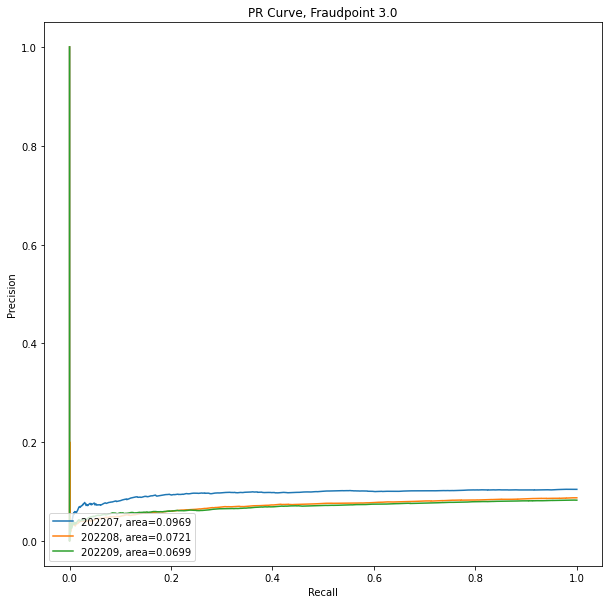

In [122]:
plt.figure(figsize=(10,10))
for x in Q3data.groupby(Q3data.YMonth):
    a,b,_= precision_recall_curve(x[1].Fraud,x[1].predicted)
    c= round(average_precision_score(x[1].Fraud,x[1].predicted),4)
    plt.plot(b,a,label=f'{x[0]}, area={c}')
plt.title('PR Curve, Fraudpoint 3.0')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(fontsize=10,loc='lower left')

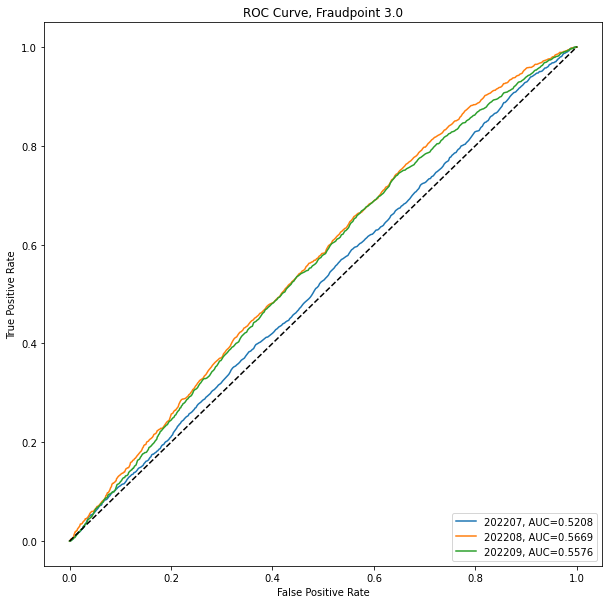

In [128]:
plt.figure(figsize=(10,10))
for x in Q3data.groupby(Q3data.YMonth):
    a,b,_= roc_curve(x[1].Fraud,x[1].predicted)
    c=round(roc_auc_score(x[1].Fraud,x[1].predicted),4)
    plt.plot(a,b,label=f'{x[0]}, AUC={c}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve, Fraudpoint 3.0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=10,loc='lower right')

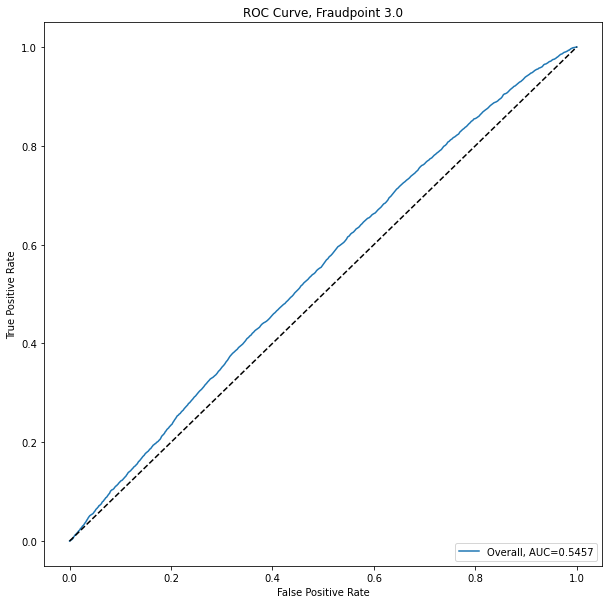

In [129]:
plt.figure(figsize=(10,10))
a,b,_= roc_curve(Q3data.Fraud,Q3data.predicted)
c=round(roc_auc_score(Q3data.Fraud,Q3data.predicted),4)
plt.plot(a,b,label=f'Overall, AUC={c}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve, Fraudpoint 3.0')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize=10,loc='lower right')